In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

### Spikelet Comparisson of the models

We want to make sure that all of the spikelets are the same, and check that the amplitude of the spikelet is big enough when compared to the amplitude of a possible noise input current.

In [3]:
params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

##### Spikelet amplitude vs. noise amplitude

In [4]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 1500
dt = 0.01

#Other constant parameters
#Isyn = [[0, 0.5], [0.5, 0]]
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
V0 = -65
tau = 0.65
y0 = [-65 , -65]
w0 = [0.0, 0.0]
u0 = [0,0]
n0 = 0
m0 = 0
h0 = 0
order = 5

#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),2))
I_IF = np.zeros((int(t_final/dt),2))
I_IZH = np.zeros((int(t_final/dt),2))
I_ML = np.zeros((int(t_final/dt),2))
x4 = np.random.normal(0,1.5,int(t_final/dt))

I_HH[:,0] = 2.5 
I_HH[:,1] = 0
I_IF[:,0] = 2.5 
I_IF[:,1] = 0
I_IF[:,1] = (1+ 1*x4)
I_IZH[:,0] = 2.5 
I_IZH[:,1] = 0 
I_ML[:,0] = 2.5
I_ML[:,1] = 0  



In [5]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust = project.models.rk_simplemodel_Rossum(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I_HH,Is,0.0,tau)
dataIF_adjust, completeIF_adjust, matrixIF_adjust = project.models.rk_if_Rossum(dt, t_final,order,y0,*params_LIF,I_IF,Is,0.0,tau,1)
dataIZH_adjust, completeIZH_adjust, matrixIZH_adjust = project.models.rk_ish_Rossum(dt,t_final,order,y0,u0,I_IZH,Is,*params_IZH,0.0,tau)
dataML_adjust, completeML_adjust, matrixML_adjust = project.models.rk_ml_Rossum(dt,t_final,2,y0,w0,*params_ML,I_ML,Is,0.0,tau)

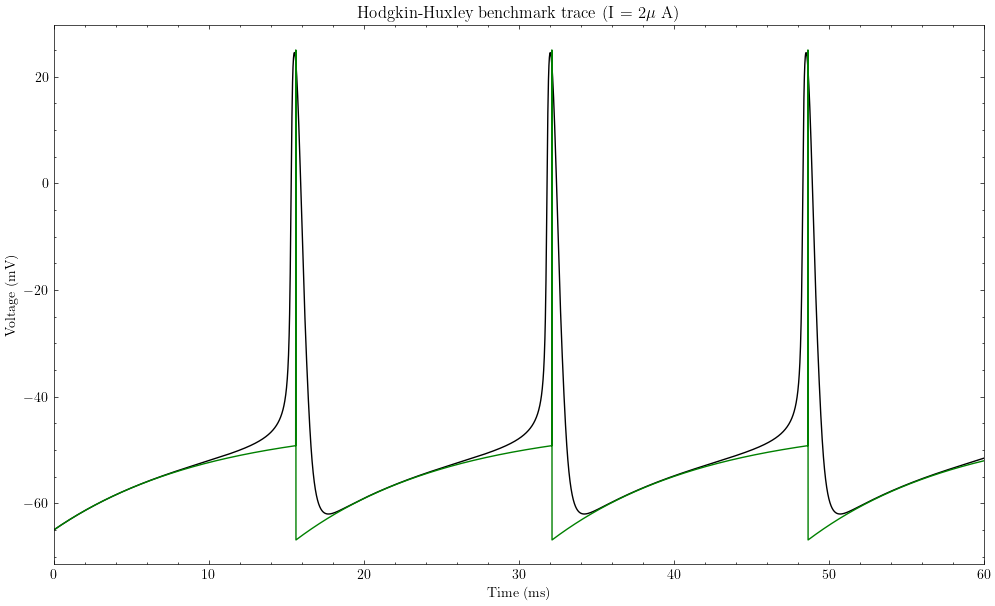

In [6]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,0], color = 'black')
plt.plot(time,dataIF_adjust[:,0], color = 'green')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,60)
plt.grid()

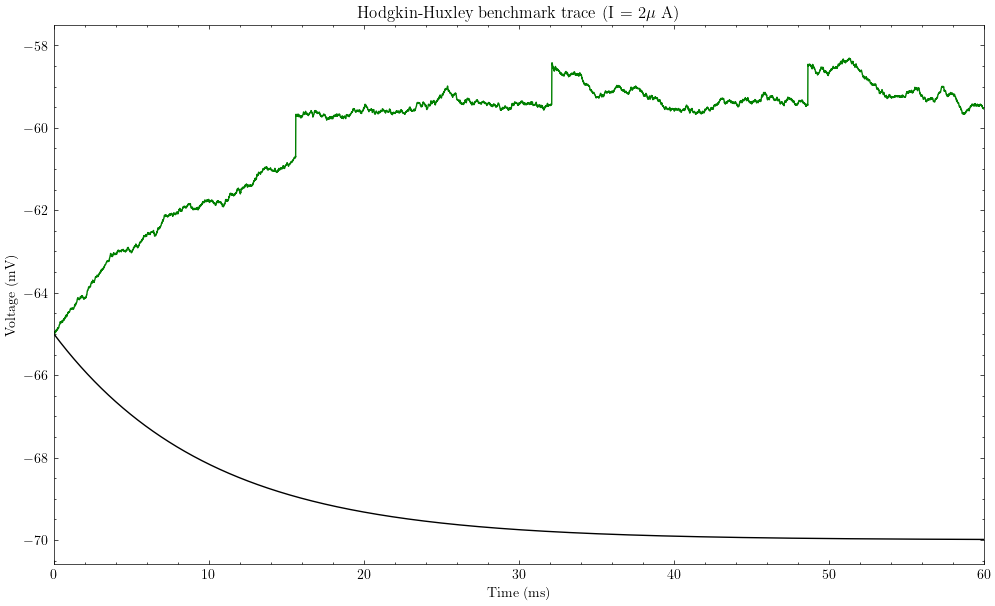

In [7]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,1], color = 'black')
plt.plot(time,dataIF_adjust[:,1], color = 'green')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,60)
plt.grid()

This hopefully checks that the amplitude of the spikelet is higher than the amplitude of the noise

#### Adjusting spikelet height

In [12]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 1500
dt = 0.01

#Other constant parameters
#Isyn = [[0, 0.5], [0.5, 0]]
Isyn_HH = [[0, 1], [1, 0]]
Isyn_IF = [[0, 1], [1, 0]]
Isyn_IZH = [[0, 1], [1, 0]]
Isyn_ML = [[0, 1], [1,0]]

Is_HH = np.array(Isyn_HH)
Is_IF = np.array(Isyn_IF)
Is_IZH = np.array(Isyn_IZH)
Is_ML = np.array(Isyn_ML)

V0 = -65
tau = 0.65
y0 = [-65 , -65]
w0 = [0.0, 0.0]
u0 = [0,0]
n0 = 0
m0 = 0
h0 = 0
order = 5

#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),2))
I_IF = np.zeros((int(t_final/dt),2))
I_IZH = np.zeros((int(t_final/dt),2))
I_ML = np.zeros((int(t_final/dt),2))
x4 = np.random.normal(0,1.5,int(t_final/dt))

I_HH[:,0] = 2.5 
I_HH[:,1] = 0
I_IF[:,0] = 2.5 
I_IF[:,1] = 0
#I_IF[:,1] = (1+ 1*x4)
I_IZH[:,0] = 2.5 
I_IZH[:,1] = 0 
I_ML[:,0] = 2.5
I_ML[:,1] = 0  

In [13]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust = project.models.rk_simplemodel_Rossum(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I_HH,Is_HH,0.012,tau)
dataIF_adjust, completeIF_adjust, matrixIF_adjust = project.models.rk_if_Rossum(dt, t_final,order,y0,*params_LIF,I_IF,Is_IF,0.012,tau,1)
dataIZH_adjust, completeIZH_adjust, matrixIZH_adjust = project.models.rk_ish_Rossum(dt,t_final,order,y0,u0,I_IZH,Is_IZH,*params_IZH,0.04,tau)
dataML_adjust, completeML_adjust, matrixML_adjust = project.models.rk_ml_Rossum(dt,t_final,2,y0,w0,*params_ML,I_ML,Is_ML,0.008,tau)

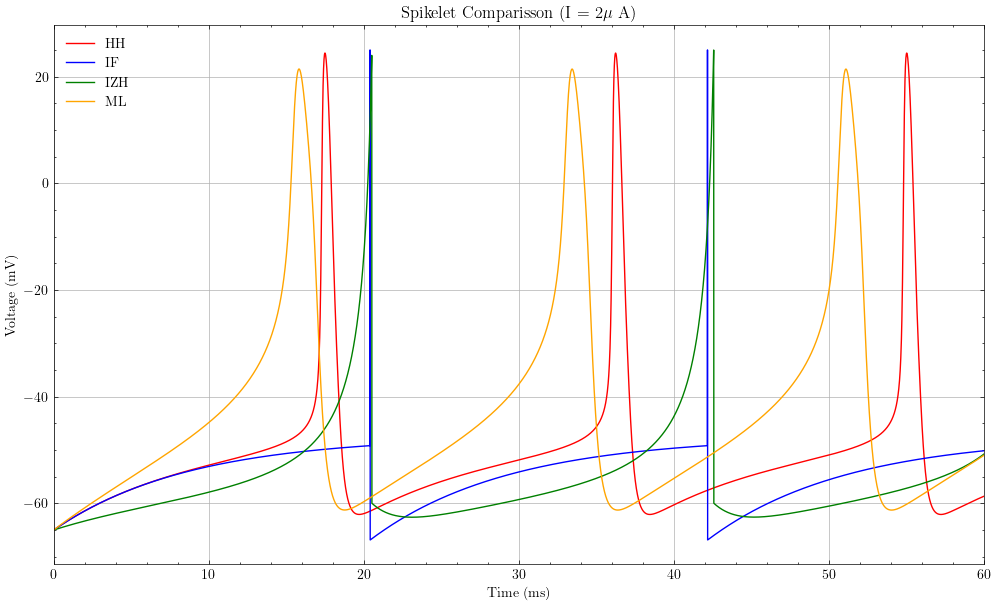

In [14]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,0], color = 'red', label = 'HH')
plt.plot(time,dataIF_adjust[:,0], color = 'blue', label = 'IF')
plt.plot(time,dataIZH_adjust[:,0], color = 'green', label = 'IZH')
plt.plot(time,dataML_adjust[:,0], color = 'orange', label = 'ML')
plt.title(r'Spikelet Comparisson (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,60)
plt.legend()

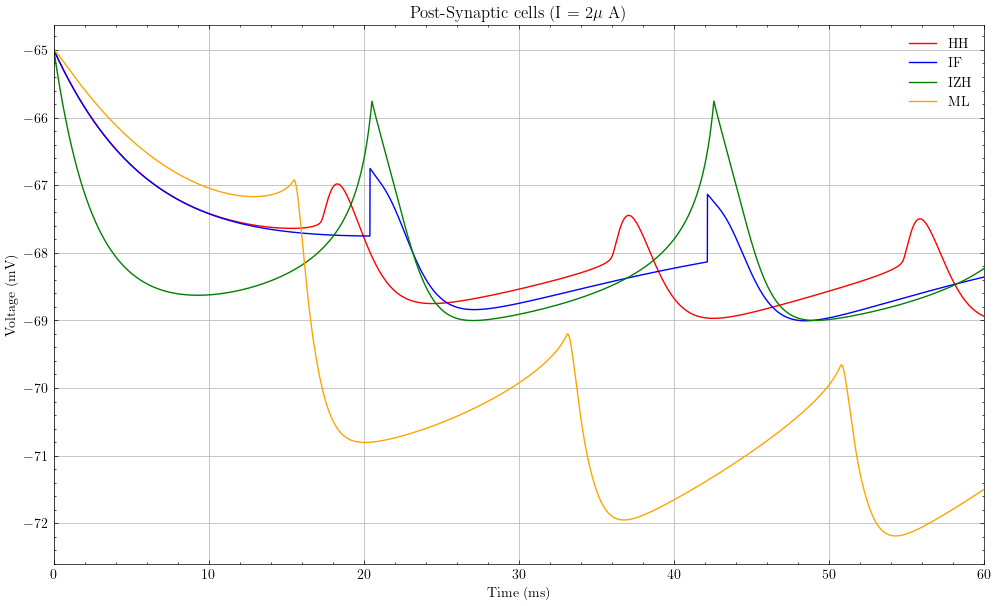

In [15]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,1], color = 'red', label = 'HH')
plt.plot(time,dataIF_adjust[:,1], color = 'blue', label = 'IF')
plt.plot(time,dataIZH_adjust[:,1], color = 'green', label = 'IZH')
plt.plot(time,dataML_adjust[:,1], color = 'orange', label = 'ML')
plt.title(r'Post-Synaptic cells (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,60)
plt.legend()